In [34]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex


In [35]:

test_data_path = "/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01_T1W_tomtestrun4and5/TYPED_FITHRF_GLMDENOISE_RR.npy"

fs_dir = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sourcedata/freesurfer' 


test_data = np.load(test_data_path, allow_pickle=True).item()
#print(test_data)


for key in test_data:
    print(key)
#R2 = test_data['onoffR2']
R2 = test_data['R2']
##meanvol = test_data['meanvol']
#noisepool = test_data['noisepool']
#HRFindex = test_data['HRFindex']
fracvalue = test_data['FRACvalue']
# print(test_data['meanvol'])
#print(test_data['noisepool'].shape)
#print(test_data['R2'].shape)
#print(noisepool)

betas = test_data['betasmd']
print("betasshape",betas.shape)
print("frac shape",fracvalue.shape)
# #switch the first and second dimension
betas = np.swapaxes(betas,0,1)

betamean = np.mean(betas,axis=3)
print(betamean.shape)





HRFindex
HRFindexrun
glmbadness
pcvoxels
pcnum
xvaltrend
noisepool
pcregressors
betasmd
R2
R2run
rrbadness
FRACvalue
scaleoffset
meanvol
betasshape (256, 256, 162, 144)
frac shape (256, 256, 162)
(256, 256, 162)


/tank/zhangs/anaconda3/lib/python3.9/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/tank/zhangs/anaconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '



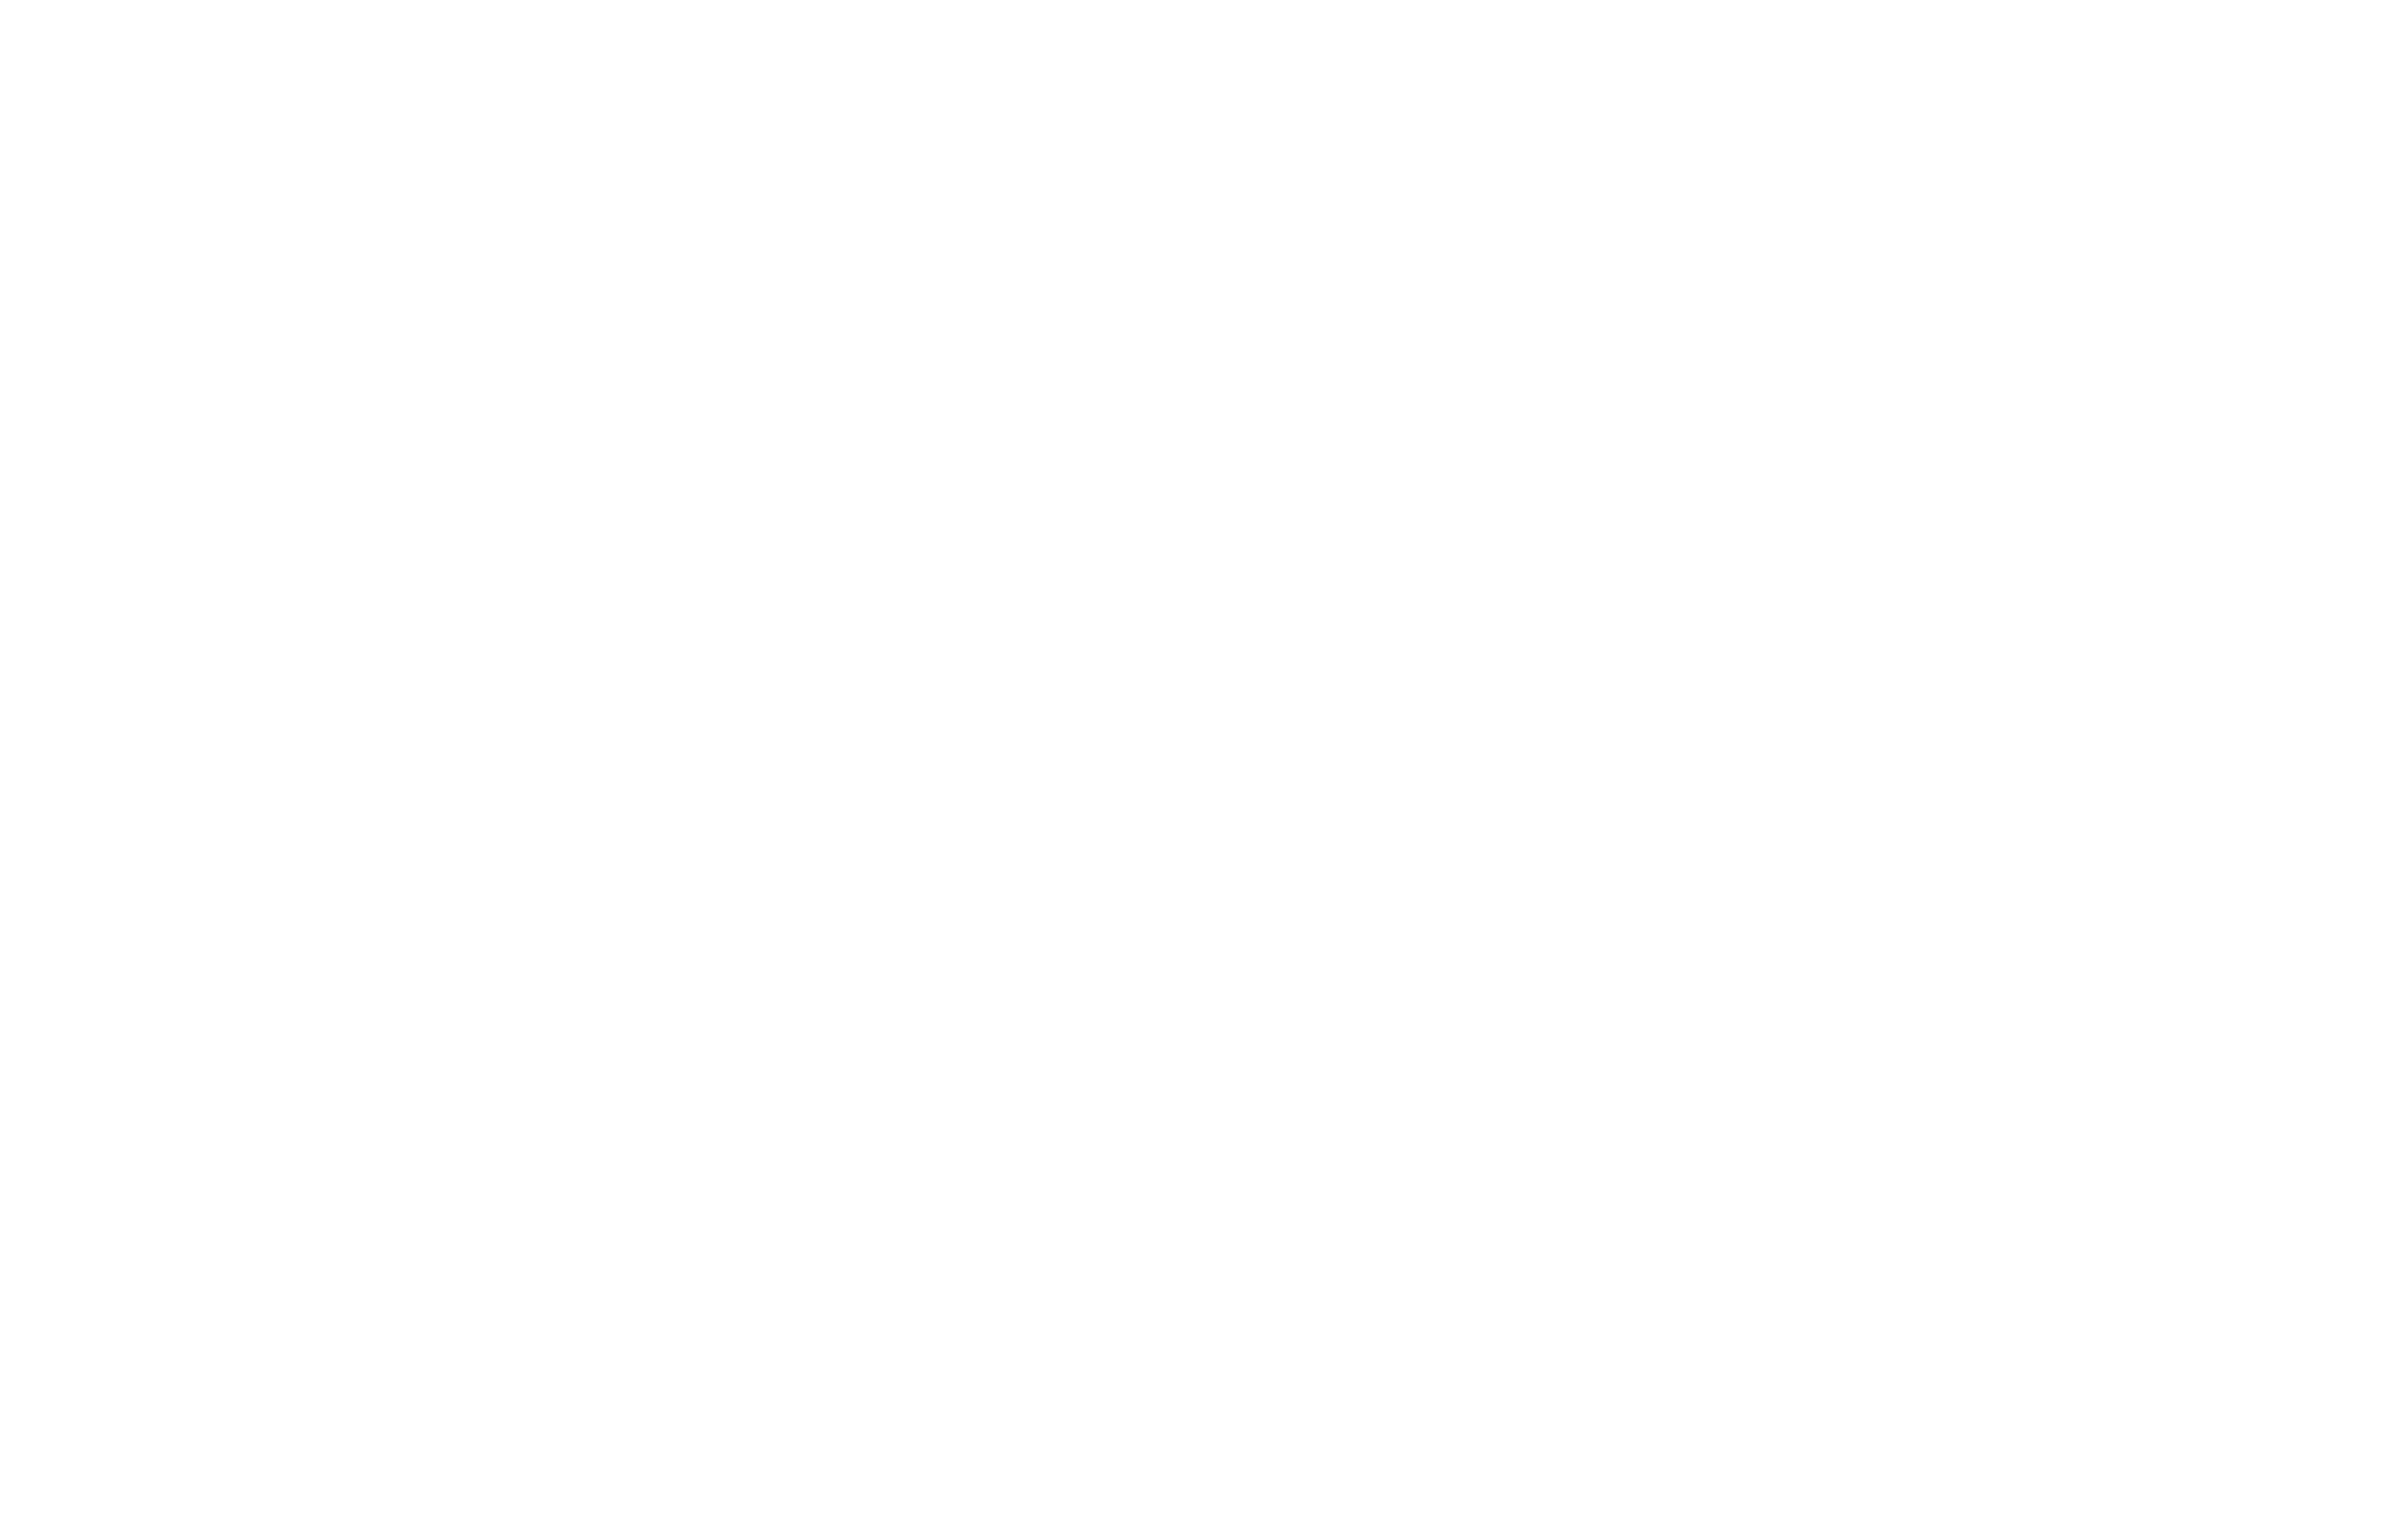
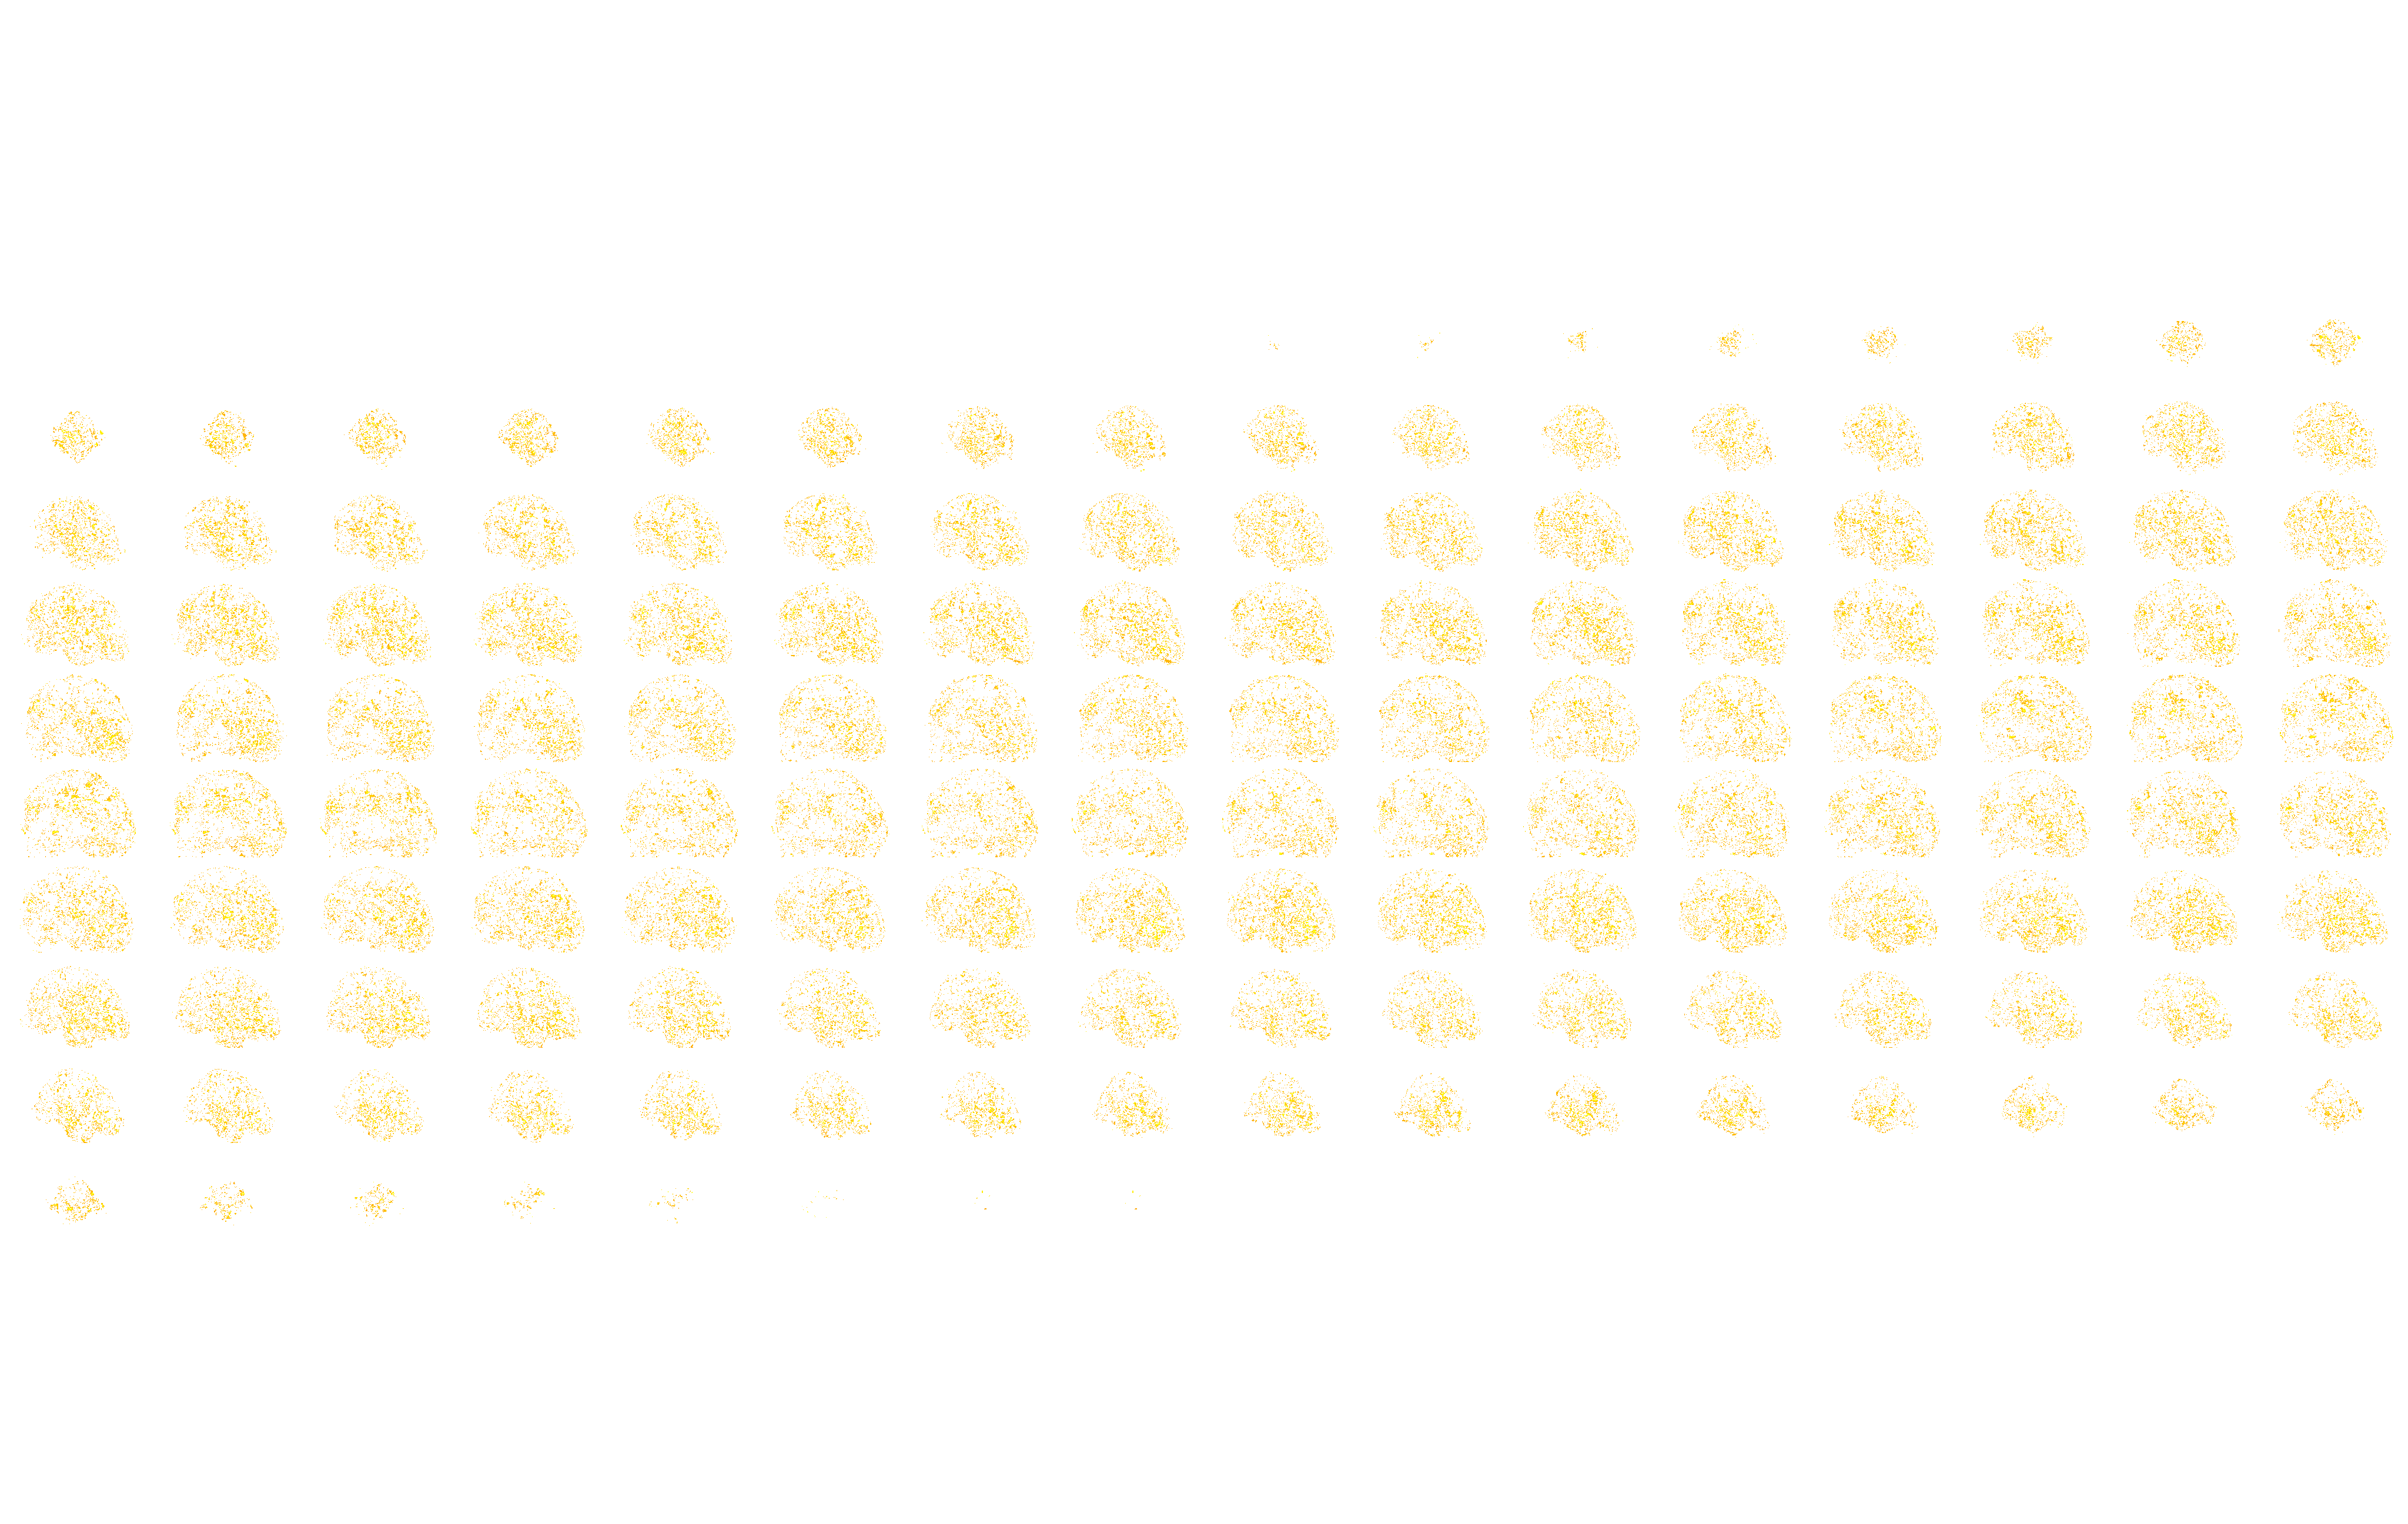

In [36]:
orig_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz"
bg_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz"
bm_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz"

# bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
# R2_masked = np.zeros_like(R2)
# R2_masked[bmask] = R2[bmask]
# betamean_masked = np.zeros_like(betamean)
# betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(R2, affine=orig_image.affine, header=orig_image.header)
# betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(
    R2_img, threshold=15, vmax=70, cmap="hot", symmetric_cmap=False, bg_img=False    
)
# view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
# view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)